In [1]:
import pandas as pd

Считаем файл и для начала просто взглянем на DataFrame, чтобы понять, какого рода данные там находятся

In [6]:
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Для начала хочется удалить признаки, которые точно не влияли на вероятность выжить, чтобы остались нужные для анализа данные. Это Name, Ticket, Fare, Cabin, Embarked.

In [8]:
df = df.drop(columns=["Name", "Ticket", "Fare", "Cabin", "Embarked"])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,NaN,1,2
889,890,1,1,male,26.0,0,0


# Age

In [9]:
df["AgeGroup"] = df["Age"] 
df["AgeGroup"].fillna(-1, inplace=True)
df["AgeGroup"] = df["AgeGroup"].map(lambda x: int(x // 10 + 1)) # Кластеризация возрастов (1 - до 10 лет, 2 - до 20 лет и т.д.)
agegroup = df[["AgeGroup", "Survived"]].groupby(["AgeGroup", "Survived"]).size().unstack()[1:] # группировка выживших и нет
agegroup.fillna(0, inplace=True)
agegroup

Survived,0,1
AgeGroup,,
1,24.0,38.0
2,61.0,41.0
3,143.0,77.0
4,94.0,73.0
5,55.0,34.0
6,28.0,20.0
7,13.0,6.0
8,6.0,0.0
9,0.0,1.0


<AxesSubplot:xlabel='AgeGroup'>

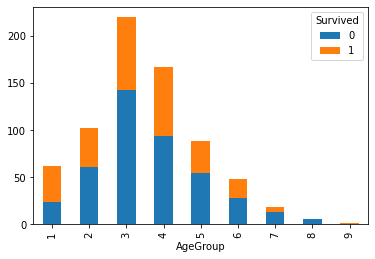

In [10]:
agegroup.plot(kind="bar", stacked=True)

In [11]:
def percent(x):
    return [round(i / sum(x) * 100, 2) for i in x]



agegroup = agegroup.apply(percent, axis=1, result_type="expand")
agegroup

,0,1
AgeGroup,,
1,38.71,61.29
2,59.80,40.20
3,65.00,35.00
4,56.29,43.71
5,61.80,38.20
6,58.33,41.67
7,68.42,31.58
8,100.00,0.00
9,0.00,100.00


<AxesSubplot:ylabel='AgeGroup'>

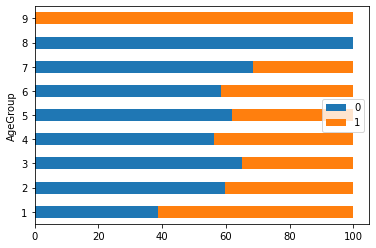

In [12]:
agegroup.plot(kind="barh", stacked=True)

На этой гистограмме видно, что в возрастной группе от 80 до 90 лет выживаемость 100%, но мы помним, что там только один человек. Очень не информативный показатель, потому что один человек мог выжить случайно. А в возсрастной группе от 70 до 80 лет выживаемость 0%. Это больше кажется логичным. Такие серьезные испытания старый человек с большей вероятностью не должен был пройти.

Из остальных выделяется группа людей до 10 лет. Там наиболее высокая выживаемость. Лично я связываю это с тем, что, скорее всего, люди из данной группы были на борту с родителями, они могли помочь им выжить. Плюс среди прочих родители этих детей были более мотивированы выжить из за своих детей. 

У всех остальных групп близкие показатели, выживаемость примерно 30-40%. Учитывая все показатели можно сделать вывод, что, если не брать в рассчет маленький процент людей либо слишком взрослых, либо слишком маленьких, то шанс выжить был примерно одинаковый у всех возрастов.

In [14]:
age_dict = agegroup[1].to_dict()
age_dict

{1: 61.29,
 2: 40.2,
 3: 35.0,
 4: 43.71,
 5: 38.2,
 6: 41.67,
 7: 31.58,
 8: 0.0,
 9: 100.0}

# Sex

In [16]:
sexgroup = df.groupby(["Sex", "Survived"]).size().unstack()
sexgroup

Survived,0,1
Sex,,
female,81,233
male,468,109


<AxesSubplot:ylabel='Sex'>

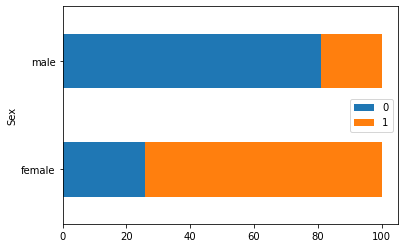

In [17]:
sexgroup = sexgroup.apply(percent, axis=1, result_type="expand")
sexgroup.plot(kind="barh", stacked=True)

Статистика по полу показывает интеересные цифры. Среди мужчин выжило меньше 20%, в то время как среди женщин больше 80%. Соответственно вероятность выжить было больше у женщин.

In [18]:
sexgroup

,0,1
Sex,,
female,25.80,74.20
male,81.11,18.89


In [19]:
sex_dict = sexgroup[1].to_dict()
sex_dict

{'female': 74.2, 'male': 18.89}

# Pclass

In [20]:
classgroup = df.groupby(["Pclass", "Survived"]).size().unstack()
classgroup

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:ylabel='Pclass'>

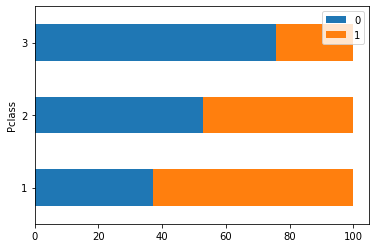

In [21]:
classgroup = classgroup.apply(percent, axis=1, result_type="expand")
classgroup.plot(kind="barh", stacked=True)

Тут статистика ожидаемая. Выживаемость больше у первого класса, потом второго, потом третьего.

In [22]:
classgroup

,0,1
Pclass,,
1,37.04,62.96
2,52.72,47.28
3,75.76,24.24


In [23]:
pclass_dict = classgroup[1].to_dict()
pclass_dict

{1: 62.96, 2: 47.28, 3: 24.24}

# Братья и сёстры / супруги и женихи

In [24]:
sibspgroup = df.groupby(["SibSp", "Survived"]).size().unstack()
sibspgroup.fillna(0, inplace=True)
sibspgroup

Survived,0,1
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,0.0
8,7.0,0.0


<AxesSubplot:ylabel='SibSp'>

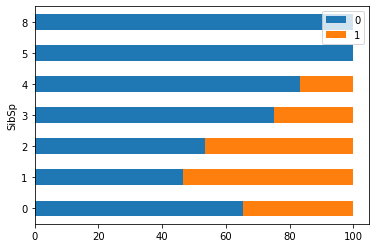

In [25]:
sibspgroup = sibspgroup.apply(percent, axis=1, result_type="expand")
sibspgroup.plot(kind="barh", stacked=True)

Вероятность выжить была больше у людей с только одним родственником своего уровня на борту. Чем их больше, тем меньше верояность выжить.

In [26]:
sibspgroup

,0,1
SibSp,,
0,65.46,34.54
1,46.41,53.59
2,53.57,46.43
3,75.00,25.00
4,83.33,16.67
5,100.00,0.00
8,100.00,0.00


In [27]:
sibs_dict = sibspgroup[1].to_dict()
sibs_dict

{0: 34.54, 1: 53.59, 2: 46.43, 3: 25.0, 4: 16.67, 5: 0.0, 8: 0.0}

# Дети / родители

In [28]:
parchgroup = df.groupby(["Parch", "Survived"]).size().unstack()
parchgroup.fillna(0, inplace=True)
parchgroup

Survived,0,1
Parch,,
0,445.0,233.0
1,53.0,65.0
2,40.0,40.0
3,2.0,3.0
4,4.0,0.0
5,4.0,1.0
6,1.0,0.0


<AxesSubplot:ylabel='Parch'>

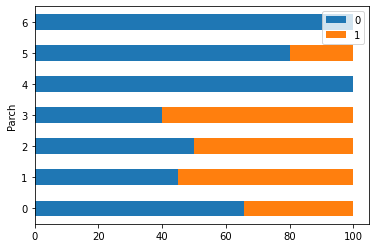

In [29]:
parchgroup = parchgroup.apply(percent, axis=1, result_type="expand")
parchgroup.plot(kind="barh", stacked=True)

In [30]:
parchgroup

,0,1
Parch,,
0,65.63,34.37
1,44.92,55.08
2,50.00,50.00
3,40.00,60.00
4,100.00,0.00
5,80.00,20.00
6,100.00,0.00


In [32]:
parch_dict = parchgroup[1].to_dict()
parch_dict

{0: 34.37, 1: 55.08, 2: 50.0, 3: 60.0, 4: 0.0, 5: 20.0, 6: 0.0}

# Вероятность выживания конкретного человека

In [45]:
my_age = 25
my_sex = "male"
my_pclass = 1
my_sibs = 1
my_parch = 2

In [46]:
def predict(age, sex, pclass, sibs, parch):
    """Функция принимает на вход данные человека.
    На основе ранее высчитанной вероятности выжить
    по каждому критерию по отдельности возвращает
    общую вероятность выжить - среднюю арифметическую.
    
    :param age: int
    :param sex: str
    :param pclass: int
    :param sibs: int
    :param parch: int
    
    :return: float
    """
    global age_dict, sex_dict, pclass_dict, sibs_dict, parch_dict
    predictions = [age_dict[age // 10 + 1], sex_dict[sex], pclass_dict[pclass], sibs_dict[sibs], parch_dict[parch]]
    return round(sum(predictions) / len(predictions), 2)

predict(my_age, my_sex, my_pclass, my_sibs, my_parch)

44.09